In [1]:
import kagglehub
import os

# Download FER2013 dataset from KaggleHub
path = kagglehub.dataset_download("msambare/fer2013")
print("Path to dataset files:", path)

100%|██████████| 60.3M/60.3M [00:01<00:00, 60.3MB/s]

Extracting files...


Path to dataset files: C:\Users\Adeen\.cache\kagglehub\datasets\msambare\fer2013\versions\1


In [2]:
# The dataset will be inside something like: /.../msambare/fer2013/<version>/
# Locate the image directory assuming it's extracted like:
train_path = os.path.join(path, "train")
val_path = os.path.join(path, "test")

In [3]:
# Confirm structure
print("Train path:", train_path)
print("Validation path:", val_path)

Train path: C:\Users\Adeen\.cache\kagglehub\datasets\msambare\fer2013\versions\1\train
Validation path: C:\Users\Adeen\.cache\kagglehub\datasets\msambare\fer2013\versions\1\test


In [4]:
# Image settings
IMG_HEIGHT, IMG_WIDTH = 48, 48
BATCH_SIZE = 64

In [5]:
# Load data using ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Define model
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # FER2013 has 7 emotion classes
])

# Compile model
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 46, 46, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 batch_normalization_1 (Batc  (None, 21, 21, 128)      512       
 hNormalization)                                                 
                                                        

In [ ]:
# Train model
EPOCHS = 30 # Train model
EPOCHS = 30

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS
)


Epoch 1/30
449/449 [==============================] - 465s 1s/step - loss: 1.9011 - accuracy: 0.2889 - val_loss: 1.7043 - val_accuracy: 0.3477
Epoch 2/30
449/449 [==============================] - 97s 217ms/step - loss: 1.6490 - accuracy: 0.3549 - val_loss: 1.5028 - val_accuracy: 0.4139
Epoch 3/30
449/449 [==============================] - 91s 202ms/step - loss: 1.5756 - accuracy: 0.3871 - val_loss: 1.4504 - val_accuracy: 0.4459
Epoch 4/30
449/449 [==============================] - 106s 236ms/step - loss: 1.5302 - accuracy: 0.4056 - val_loss: 1.4158 - val_accuracy: 0.4542
Epoch 5/30
449/449 [==============================] - 132s 294ms/step - loss: 1.4804 - accuracy: 0.4247 - val_loss: 1.3520 - val_accuracy: 0.4714
Epoch 6/30
449/449 [==============================] - 97s 215ms/step - loss: 1.4462 - accuracy: 0.4432 - val_loss: 1.3391 - val_accuracy: 0.4918
Epoch 7/30
449/449 [==============================] - 96s 213ms/step - loss: 1.4153 - accuracy: 0.4553 - val_loss: 1.3129 - val_ac

KeyboardInterrupt: 

In [8]:
# Save the model
model.save("fer2013_emotion_recognition_model.h5")

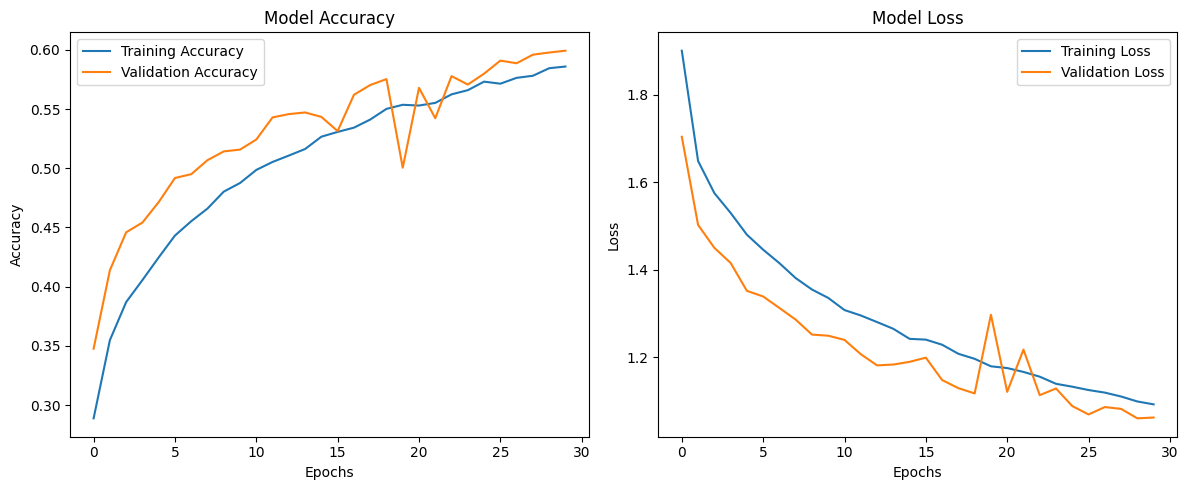

In [9]:
#Plot the training history
import matplotlib.pyplot as plt

def plot_training_history(history):
    plt.figure(figsize=(12, 5))
    
    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

plot_training_history(history)

In [10]:
#Load the model later using:
from tensorflow.keras.models import load_model

model = load_model("fer2013_emotion_recognition_model.h5")

# Evaluate the model
score = model.evaluate(val_generator)
print("Validation Loss:", score[0])
print("Validation Accuracy:", score[1])


113/113 [==============================] - 5s 42ms/step - loss: 1.0633 - accuracy: 0.5985
Validation Loss: 1.0633337497711182
Validation Accuracy: 0.5984954237937927


---

---

Customized CNN Model 

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, Conv2D, BatchNormalization, Activation,
                                     Add, GlobalAveragePooling2D, Dense, Dropout, Multiply)
from tensorflow.keras.optimizers import Adam


In [2]:
def residual_block(x, filters, use_attention=False):
    shortcut = x

    x = Conv2D(filters, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)

    if use_attention:
        se = GlobalAveragePooling2D()(x)
        se = Dense(filters // 8, activation='relu')(se)
        se = Dense(filters, activation='sigmoid')(se)
        se = tf.expand_dims(tf.expand_dims(se, axis=1), axis=1)
        x = Multiply()([x, se])

    x = Add()([shortcut, x])
    x = Activation('relu')(x)
    return x


In [3]:
def build_emotionnet_lite(input_shape=(48, 48, 3), num_classes=7):
    inputs = Input(shape=input_shape)

    x = Conv2D(64, (3, 3), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = residual_block(x, 64, use_attention=True)
    x = residual_block(x, 64)

    x = Conv2D(128, (3, 3), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = residual_block(x, 128, use_attention=True)
    x = residual_block(x, 128)

    x = Conv2D(256, (3, 3), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = residual_block(x, 256, use_attention=True)

    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    return model


In [4]:
model = build_emotionnet_lite()
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 48, 48, 64)   1792        ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 48, 48, 64)  256         ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 48, 48, 64)   0           ['batch_normalization[0][0]']

In [9]:
import os
import kagglehub
path = kagglehub.dataset_download("msambare/fer2013")

train_path = os.path.join(path, "train")
val_path = os.path.join(path, "test")

In [12]:
# Image settings
IMG_HEIGHT, IMG_WIDTH = 48, 48
BATCH_SIZE = 64

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [15]:
model.fit(train_generator, validation_data=val_generator, epochs=15)

Epoch 1/15
449/449 [==============================] - 835s 2s/step - loss: 1.8243 - accuracy: 0.2453 - val_loss: 1.8083 - val_accuracy: 0.2510
Epoch 2/15
449/449 [==============================] - 665s 1s/step - loss: 1.7422 - accuracy: 0.2809 - val_loss: 1.6820 - val_accuracy: 0.3158
Epoch 3/15
449/449 [==============================] - 749s 2s/step - loss: 1.6097 - accuracy: 0.3585 - val_loss: 1.6083 - val_accuracy: 0.3477
Epoch 4/15
449/449 [==============================] - 893s 2s/step - loss: 1.4629 - accuracy: 0.4348 - val_loss: 1.4575 - val_accuracy: 0.4110
Epoch 5/15
449/449 [==============================] - 682s 2s/step - loss: 1.3534 - accuracy: 0.4833 - val_loss: 1.3953 - val_accuracy: 0.4487
Epoch 6/15
449/449 [==============================] - 657s 1s/step - loss: 1.2659 - accuracy: 0.5169 - val_loss: 1.2385 - val_accuracy: 0.5188
Epoch 7/15
449/449 [==============================] - 660s 1s/step - loss: 1.2087 - accuracy: 0.5397 - val_loss: 1.3689 - val_accuracy: 0.4979

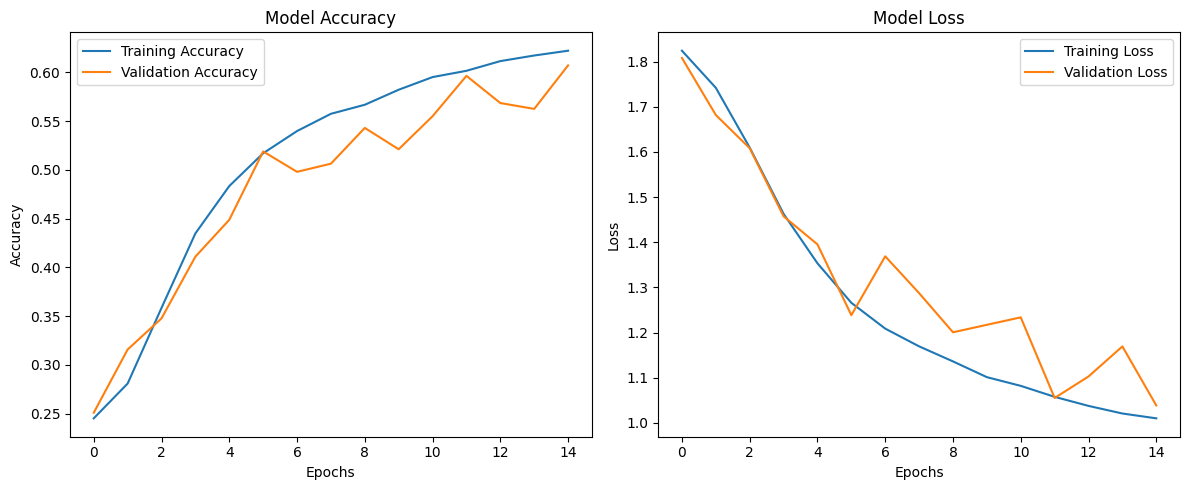

In [16]:
# plot the training history
import matplotlib.pyplot as plt
def plot_training_history(history):
    plt.figure(figsize=(12, 5))
    
    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

plot_training_history(model.history)

In [20]:
#save the model

model.save("emotionnet_lite_model.h5")

In [18]:
# evaluate the model
score = model.evaluate(val_generator)
print("Validation Loss:", score[0])
print("Validation Accuracy:", score[1])

113/113 [==============================] - 37s 330ms/step - loss: 1.0385 - accuracy: 0.6070
Validation Loss: 1.0385416746139526
Validation Accuracy: 0.6069936156272888
